In [1]:
#NOTE 

#All pneumonias cause inflammation and fluid in your lungs.
#viruses and bacteria causes pneumonia witch has a lot of types 
#researchs suggests that the SARS-CoV-2 virus that causes COVID pneumonia moves differently through your 
#lungs than other viruses and bacteria that cause pneumonia
#Tuberculosis (TB) is a potentially fatal and contagious disease caused by the bacterium Mycobacterium tuberculosis.
#And other bacteria can cause pneumonia. 
#Pneumonia is inflammation of the lungs that is caused by infectious organisms or chemical or physical irritants
#Viral Pneumonia; Viruses affect both sides of the lungs
#Bacterial Pneumonia; Bacteria tend to aggressively attack one lobe or section of the lungs
#both cases of pneumonia (causes by bacteria or virus) was refered to as just pnemonia 

In [2]:
#Images were collected from several datasets 

In [5]:
import os 
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


tr_images = []
tr_labels = []

ts_images = []
ts_labels = []



In [ ]:
#loading the data

In [6]:
s = 0
n = 0
directory = './lungsdata/PNEUMONIA train'
for file in os.scandir(directory):
        if file.name.split("-")[0] == "BACTERIA" : 
            tr_images.append(np.asarray(Image.open(directory+'/'+file.name).convert('L').resize((256,256))))
            tr_labels.append([0,1,0,0,0])
            s = s + 1
        else :
            tr_images.append(np.asarray(Image.open(directory+'/'+file.name).convert('L').resize((256,256))))
            tr_labels.append([0,0,1,0,0]) #virus
            n = n + 1
     
print(s , n)

2538 1345


In [9]:
s = 0
directory = './lungsdata/TURBERCULOSIS train'
for file in os.scandir(directory):
    tr_images.append(np.asarray(Image.open(directory+'/'+file.name).convert('L').resize((256,256))))
    tr_labels.append([0,0,0,0,1])
    s = s + 1 
print(s)

659


In [10]:
s = 0
directory = './lungsdata/Normal train'
for file in os.scandir(directory):
    tr_images.append(np.asarray(Image.open(directory+'/'+file.name).convert('L').resize((256,256))))
    tr_labels.append([1,0,0,0,0])
    s = s + 1 
print(s)

2005


In [11]:
s = 0
directory = './lungsdata/COVID19 train'
for file in os.scandir(directory):
    tr_images.append(np.asarray(Image.open(directory+'/'+file.name).convert('L').resize((256,256))))
    tr_labels.append([0,0,0,1,0])
    s = s + 1 
print(s)            

4144


In [12]:
s = 0
directory = './lungsdata/Normal test'
for file in os.scandir(directory):
    if s < 116 : 
        ts_images.append(np.asarray(Image.open(directory+'/'+file.name).convert('L').resize((256,256))))
        ts_labels.append([1,0,0,0,0])
    s = s + 1 
print(s)    

100


In [15]:
s = 0
directory = './lungsdata/TURBERCULOSIS test'
for file in os.scandir(directory):
        ts_images.append(np.asarray(Image.open(directory+'/'+file.name).convert('L').resize((256,256))))
        ts_labels.append([0,0,0,0,1])
        s = s + 1 
print(s)    

41


In [16]:
s = 0
w = 0 
directory = './lungsdata/PNEUMONIA test'
for file in os.scandir(directory):
        if file.name.split("-")[0] == "BACTERIA":  
            ts_images.append(np.asarray(Image.open(directory+'/'+file.name).convert('L').resize((256,256))))
            ts_labels.append([0,1,0,0,0])
            w = w + 1 
        else :
            ts_images.append(np.asarray(Image.open(directory+'/'+file.name).convert('L').resize((256,256))))
            ts_labels.append([0,0,1,0,0])
            s = s + 1 
print(s , w)

156 242


In [17]:
s = 0
directory = './lungsdata/COVID19 test'
for file in os.scandir(directory):
    ts_images.append(np.asarray(Image.open(directory+'/'+file.name).convert('L').resize((256,256))))
    ts_labels.append([0,0,0,1,0])
    s = s + 1 
print(s)    

115


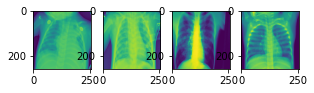

In [31]:
plt.subplot(2,5,1)
plt.imshow(tr_images[10],label='PNEUMONIA')
plt.subplot(2,5,2)
plt.imshow(tr_images[3000],label='TURBERCULOSIS')
plt.subplot(2,5,3)
plt.imshow(tr_images[4000],label='Normal')
plt.subplot(2,5,4)
plt.imshow(tr_images[5000],label='COVID19')
plt.show()
#plt.imshow(np.asarray(Image.open(directory+'/'+file.name+'/'+i.name+'/'+im.name).resize((256,256))))       

In [19]:
tr_images = np.asarray(tr_images)
ts_labels = np.asarray(ts_labels)
tr_labels = np.asarray(tr_labels)
ts_images = np.asarray(ts_images)           

In [3]:
from sklearn.model_selection import train_test_split 
import tensorflow as tf
from tensorflow import keras
from  tensorflow.keras import losses,metrics,optimizers
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [43]:
chest_model = keras.Sequential([
                                    layers.Conv2D(32,3,padding='valid',strides=(1, 1),activation='tanh',input_shape=(256, 256, 1),use_bias=True,kernel_initializer="HeNormal",bias_initializer="HeNormal"),
                                    layers.MaxPooling2D(padding="valid",pool_size=(2,2)),
                                    layers.Conv2D(64,3,padding='valid',strides=(1, 1),activation='tanh'),
                                    layers.MaxPooling2D(padding="valid",pool_size=(2,2)),
                                    layers.Conv2D(128,3,padding='valid',strides=(1, 1),activation='tanh'),
                                    layers.MaxPooling2D(padding="valid",pool_size=(2,2)),
                                    layers.Flatten(),
                                    layers.Dropout(.4),
                                    layers.Dense(50,activation='tanh'),
                                    layers.Dropout(.4),
                                    layers.Dense(5,activation="softmax")])
   
lr = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.00001,
    decay_steps=100000,
    decay_rate=0.1)

chest_model.compile(loss = losses.CategoricalCrossentropy(),  
   optimizer = tf.keras.optimizers.Adam(lr) , metrics = [metrics.CategoricalAccuracy()])
his = chest_model.fit(tr_images,tr_labels,epochs = 35 , batch_size = 60 )

#tanh is slitly better than relu
#the model overfitts if its trainned too much 
#the images of diffrent classes are similair looking, at first the model was trained using a constante learning rate and it gave 
#poor results


Epoch 1/35
179/179 [==============================] - 565s 3s/step - loss: 0.9950 - categorical_accuracy: 0.6347
Epoch 2/35
179/179 [==============================] - 559s 3s/step - loss: 0.6329 - categorical_accuracy: 0.7747
Epoch 3/35
179/179 [==============================] - 583s 3s/step - loss: 0.5398 - categorical_accuracy: 0.8045
Epoch 4/35
179/179 [==============================] - 549s 3s/step - loss: 0.4753 - categorical_accuracy: 0.8283
Epoch 5/35
179/179 [==============================] - 574s 3s/step - loss: 0.4385 - categorical_accuracy: 0.8405
Epoch 6/35
179/179 [==============================] - 527s 3s/step - loss: 0.4179 - categorical_accuracy: 0.8458
Epoch 7/35
179/179 [==============================] - 526s 3s/step - loss: 0.3892 - categorical_accuracy: 0.8580
Epoch 8/35
179/179 [==============================] - 554s 3s/step - loss: 0.3699 - categorical_accuracy: 0.8653
Epoch 9/35
179/179 [==============================] - 516s 3s/step - loss: 0.3544 - categorical_

In [44]:
chest_model.evaluate(ts_images,ts_labels)

21/21 [==============================] - 8s 352ms/step - loss: 0.4072 - categorical_accuracy: 0.8471


[0.4072226285934448, 0.8470947742462158]

In [46]:
chest_model.save_weights("./lungs_5_deseases5.cpkt")

In [48]:
chest_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 128)     

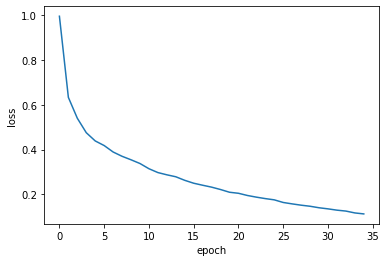

In [49]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.arange(0, 35),his.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

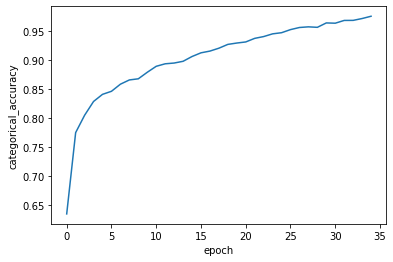

In [50]:
plt.figure()
plt.plot(np.arange(0, 35),his.history['categorical_accuracy'])
plt.xlabel('epoch')
plt.ylabel('categorical_accuracy')
plt.show()


In [6]:
def model(image):
    if np.argmax(chest_model1.predict(np.asarray(image).reshape(-1,256,256,1),verbose = 0 )) == 3 : 
        return "Covid"
    elif np.argmax(chest_model1.predict(np.asarray(image).reshape(-1,256,256,1),verbose = 0 )) == 1 :
        return "Pneumonia bacteria"
    elif np.argmax(chest_model1.predict(np.asarray(image).reshape(-1,256,256,1),verbose = 0 )) == 2 :
        return "Pneumonia virus"
    elif np.argmax(chest_model1.predict(np.asarray(image).reshape(-1,256,256,1),verbose = 0 )) == 4 :
        return "Turberculosis"
    else :
        return "Normal"

In [52]:
#exampel 
from PIL import Image

sick1 = Image.open('./NORMAL2-IM-0627-0001.jpeg')#normal
sick1 = sick1.resize((256,256)).convert('L')
sick2 = Image.open('./corona.jpg')#corona
sick2 = sick2.resize((256,256)).convert('L')
sick3 = Image.open('./person136_bacteria_654.jpeg')#pneumonia bacteria
sick3 = sick3.resize((256,256)).convert('L')
sick4 = Image.open('./person1556_virus_2699.jpeg')#pneumonia virus
sick4 = sick4.resize((256,256)).convert('L')
sick5 = Image.open('./Tuberculosis-686.png')#turberculosis
sick5 = sick5.resize((256,256)).convert('L')

'Normal'

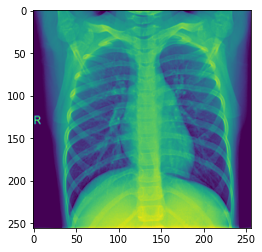

In [53]:
plt.imshow(sick1)
model(sick1)

'Turberculosis'

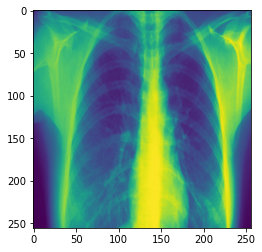

In [54]:
plt.imshow(sick2)
model(sick2)

'Pneumonia bacteria'

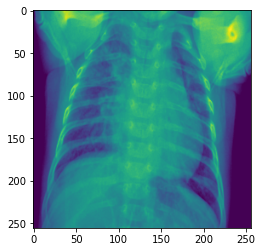

In [55]:
plt.imshow(sick3)
model(sick3)

'Pneumonia virus'

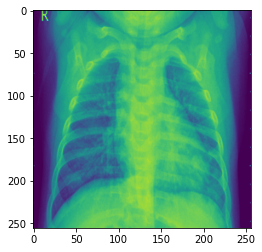

In [56]:
plt.imshow(sick4)
model(sick4)

'Turberculosis'

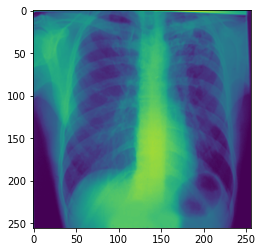

In [57]:
plt.imshow(sick5)
model(sick5)